# U.S. Medical Insurance Costs (EDA)

In [1]:
### Portfolio project: US Medical Insurance Costs

# import libraries 
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
import seaborn as sns

pd.set_option('display.max_colwidth', None)
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
## Create a master Dataframe out of `insurance.csv`
dataset = pd.read_csv('insurance.csv')

## First inspection of the Dataframe for missing values and duplicates
# display(HTML(dataset.head().to_html()))
print("The number of NaN values:")
print(dataset.isna().sum(),'\n')
print("The number of duplicates:")
print(dataset.duplicated().value_counts())

The number of NaN values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

The number of duplicates:
False    1337
True        1
dtype: int64


In [3]:
## Drop duplicates since these two rows are likely to belong to the same person
dataset.drop_duplicates(inplace=True)

## Check for duplicates again
print(dataset.duplicated().value_counts())

## Change column name
dataset = dataset.rename(columns={'smoker':'smoke_habit'})
# display(HTML(dataset.head().to_html()))

False    1337
dtype: int64


First, I'd like to take a look at the descriptive statistics of the whole `dataset`.

In [4]:
display(HTML(dataset.describe().to_html()))

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


__In this project, I plan to analyze the correlation between the__ `age`, `sex`, `bmi`, `smoker`, `region` __and the__ `charges`. __My ideas for analysis include:__
1. The averages in 4 different regions: `northeast` `northwest` `southeast` `southwest`
2. The difference in medical insurance cost between `smoker` and `non-smoker`
3. The `age` and `bmi` distribution 

In order to conduct those analyses, I develop different functions to create different dictionaries with different keys. Also, I create functions to calculate the percentages, the averages, which can be used with all types of dictionaries. So, they're quite "versatile." 

### Functions Collections

In [5]:
## Create a function to calculate averages
def cal_average(dataset, group_column, cal_column):
    average_df = dataset.groupby(group_column)[cal_column].mean().reset_index()
    average_df[group_column] = average_df[group_column].str.title()
    return average_df

### Analysis 1: Average medical insurance cost by regions

In [6]:
## Check for unique regions in the dataset
regions = dataset.region.unique()
print(regions)

['southwest' 'southeast' 'northwest' 'northeast']


,Region,Medical Insurance Cost,BMI,Age,Children
0,Northeast,13406.384516,29.173503,39.268519,1.046296
1,Northwest,12450.840844,29.195494,39.259259,1.151235
2,Southeast,14735.411438,33.355989,38.939560,1.049451
3,Southwest,12346.937377,30.596615,39.455385,1.141538


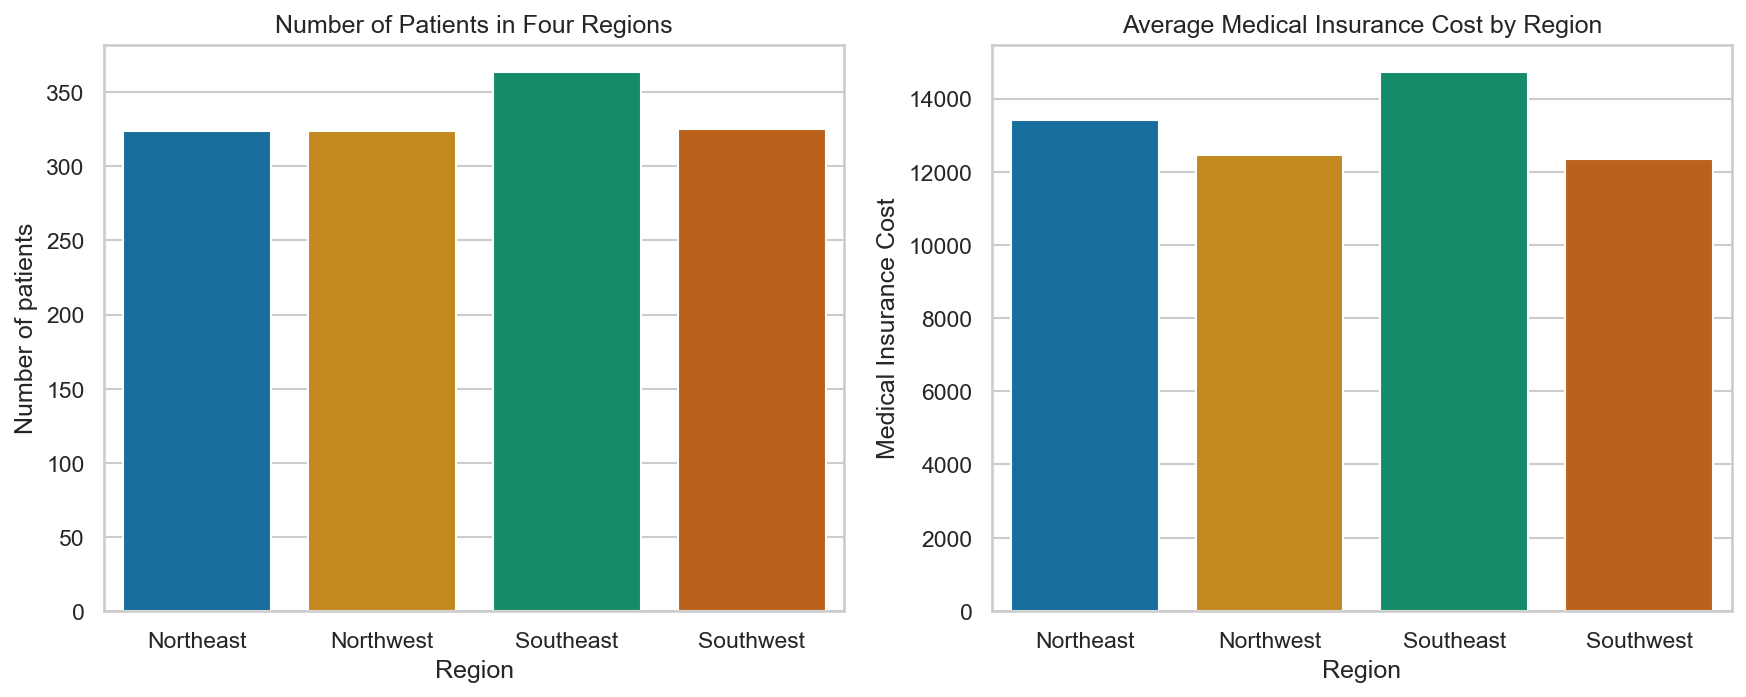

In [8]:
## Check for the number of patients in each region
region_pop = dataset.groupby('region').age.count().reset_index()
region_pop.region = region_pop.region.str.title()
region_pop.columns = ['Region','Number of patients']
# display(HTML(region_pop.to_html()))


## Calculate the average medical insurance cost in each region
region_avg_cost = cal_average(dataset, 'region', 'charges')
region_avg_bmi = cal_average(dataset, 'region', 'bmi')
region_avg_age = cal_average(dataset, 'region', 'age')
region_avg_children = cal_average(dataset, 'region', 'children')

## Merge all dataframes for region
region_data = pd.merge(region_avg_cost, region_avg_bmi).merge(region_avg_age).merge(region_avg_children)
region_data.columns = ['Region', 'Medical Insurance Cost', 'BMI', 'Age', 'Children']
display(HTML(region_data.to_html()))

## Visualize averages by region
axs = plt.subplots(ncols=2,nrows=1,figsize=(14,5), dpi=150)
sns.barplot(x='Region', y='Number of patients', data=region_pop, palette='colorblind', ax=axs[1][0]
           ).set_title('Number of Patients in Four Regions')
sns.barplot(x='Region', y='Medical Insurance Cost', data=region_data, palette='colorblind', ax=axs[1][1]
           ).set_title('Average Medical Insurance Cost by Region')
plt.show()

### Analysis 2: Smoker vs. Non-smoker

In [8]:
# Modify the values of `smoker`
dataset['smoke_habit'] = dataset.apply(lambda row: 'non-smoker' if row.smoke_habit == 'no' else 'smoker', axis=1)
# print(dataset.head())

,Smoking Habit,Medical Insurance Cost,BMI,Age,Children
0,Non-Smoker,8440.660307,30.651853,39.404516,1.091251
1,Smoker,32050.231832,30.708449,38.514599,1.113139


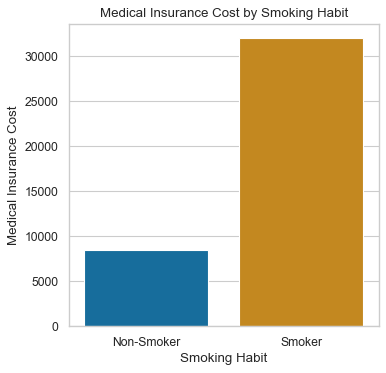

In [58]:
# Calculate the difference in average medical insurance cost between smokers & non-smokers
smoke_avg_cost = cal_average(dataset, 'smoke_habit', 'charges' )
smoke_avg_bmi = cal_average(dataset, 'smoke_habit', 'bmi' )
smoke_avg_age = cal_average(dataset, 'smoke_habit', 'age' )
smoke_avg_children = cal_average(dataset, 'smoke_habit', 'children' )

smoke_data = pd.merge(smoke_avg_cost, smoke_avg_bmi).merge(smoke_avg_age).merge(smoke_avg_children)
smoke_data.columns = ['Smoking Habit', 'Medical Insurance Cost', 'BMI', 'Age', 'Children']
display(HTML(smoke_data.to_html()))

## The difference in medical insurance cost between smokers and non-smokers
axs = plt.subplots(ncols=1,nrows=1,figsize=(5,5), dpi=80)
sns.barplot(x='Smoking Habit', y='Medical Insurance Cost', data=smoke_data, palette='colorblind'
           ).set_title('Medical Insurance Cost by Smoking Habit')
plt.show()

### Analysis 3: Age and BMI distribution

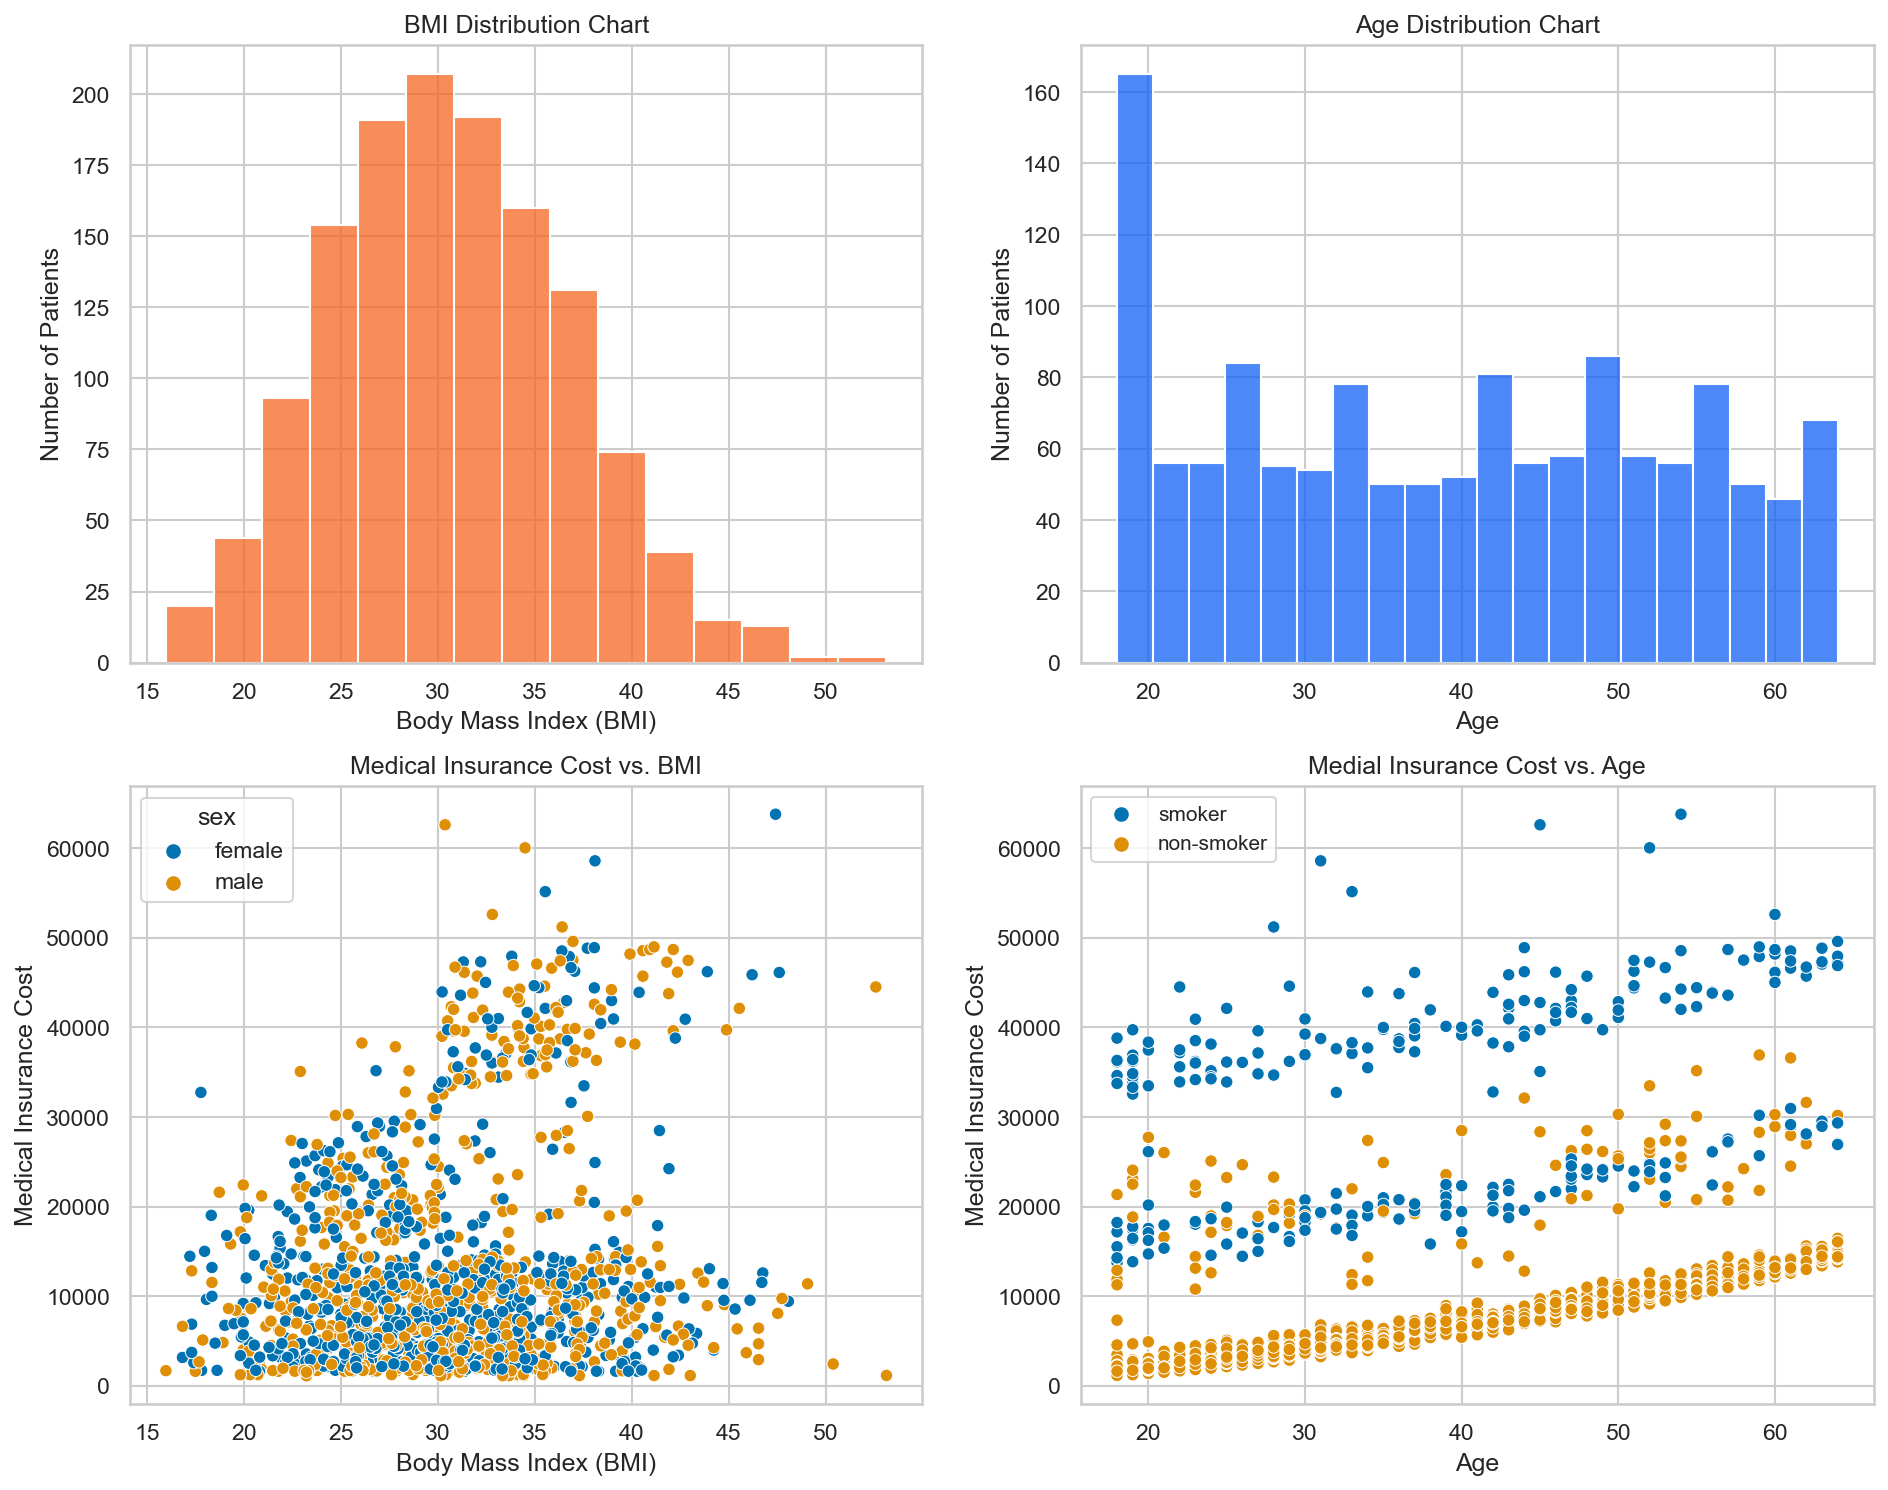

In [69]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,12), dpi=150)

## Age and BMI distribution 
sns.histplot(data=dataset.age, color='#1060F6', bins=20, ax=axs[0][1]
            ).set(xlabel='Age',ylabel='Number of Patients',title='Age Distribution Chart')
sns.histplot(dataset.bmi, color='#F66722', bins=15, ax=axs[0][0]
            ).set(xlabel='Body Mass Index (BMI)',ylabel='Number of Patients',title='BMI Distribution Chart')
plt.cla()
## Scatter plot for medical insurance cost and BMI
sns.scatterplot(data=dataset, x='bmi', y='charges', hue='sex', palette='colorblind', ax=axs[1][0]
               ).set(xlabel='Body Mass Index (BMI)',ylabel='Medical Insurance Cost',
                     title='Medical Insurance Cost vs. BMI')

## Scatter plot for medical insurance cost and age
sns.scatterplot(data=dataset, x='age',y='charges', hue='smoke_habit', ax=axs[1][1],
                palette='colorblind').set(xlabel='Age',ylabel='Medical Insurance Cost',
                                          title='Medial Insurance Cost vs. Age')
plt.legend(title='', fontsize='medium', loc='upper left')
plt.show()